### Exploratory Data Analysis
***
This part of the notebook is organised or worked out sequencitially like a pipe line where data gets modulated and plotted into variaous graphs to derive insights

In [52]:
# Data Libraries 
import pandas as pd 
import numpy as np

# plotting libraries 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import seaborn as sns

# ignore warnings 
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [57]:
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
# data path 
# MacOS
abspath = './Data/Data.csv'
metadata = './Data/terrorism_metadata.csv'
# Windows 
# abspath = None
# metadata = None

In [3]:
# Functional Meta-Data --> usage - meta_data['column-name']
meta = pd.read_csv(metadata)
meta = meta.drop(meta.columns[2:],axis=1)
meta_data = {}
for x,y in zip(list(meta['Column']),list(meta['Desc'])):
    meta_data[x] = y

meta_data

{'eventid': 'Unique id for each event',
 'iyear': 'Year of incident',
 'imonth': 'Month of incident',
 'iday': 'Numeric day on which the incident occurred.',
 'extended': 'Yes/No for for whether the incedent extended for more than 24 hours.',
 'country': 'Country code',
 'country_txt': 'Country where the incident took place',
 'region ': 'Region code based on 12 regions.',
 'region_txt': 'Region in which the incident occurred',
 'city': 'Name of the city/village/town in which the incident took place.',
 'provstate': 'Name of the first order subnational region during the time of the event',
 'latitude': 'Coordinate',
 'longitude': 'Coordinate',
 'location': '*Exact* location where the incident took place',
 'summary': 'synopsis',
 'success': 'Yes/No for the success of the terrorist strike',
 'suicide': 'Yes/No for whether the attack was a suicide attack',
 'attacktype1_txt': 'The general method of attack/ the tactics used.',
 'targettype1_txt': 'The general category of victim of the att

In [4]:
# data encoding = latin1
data = pd.read_csv(abspath,encoding='latin1',low_memory=False)

In [5]:
data = data.drop('Unnamed: 0',axis=1) # dropping the redundant column

In [6]:
data.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,city,...,target1,natlty1,natlty1_txt,gname,motive,nperps,weaptype1,weaptype1_txt,nkill,propextent
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,...,Julio Guzman,58.0,Dominican Republic,MANO-D,Unknown,NaN,13,Unknown,1.0,NaN
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Mexico city,...,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,Unknown,7.0,13,Unknown,0.0,NaN
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Unknown,...,Employee,217.0,United States,Unknown,Unknown,NaN,13,Unknown,1.0,NaN
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Athens,...,U.S. Embassy,217.0,United States,Unknown,Unknown,NaN,6,Explosives,NaN,NaN
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,U.S. Consulate,217.0,United States,Unknown,Unknown,NaN,8,Incendiary,NaN,NaN


In [7]:
# data stats
print('Number of rows : {}'.format(data.shape[0]))
print('Number of columns : {}'.format(data.shape[1]))
print('Data Size :  {}'.format(data.size))

Number of rows : 181691
Number of columns : 29
Data Size :  5269039


In [8]:
# just for country acronyms
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

In [9]:
df['CODE']

0      AFG
1      ALB
2      DZA
3      ASM
4      AND
      ... 
217    VGB
218    WBG
219    YEM
220    ZMB
221    ZWE
Name: CODE, Length: 222, dtype: object

In [10]:
data[data['country_txt']=='United States']

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,city,...,target1,natlty1,natlty1_txt,gname,motive,nperps,weaptype1,weaptype1_txt,nkill,propextent
5,197001010002,1970,1,1,0,217,United States,1,North America,Cairo,...,Cairo Police Headquarters,217.0,United States,Black Nationalists,To protest the Cairo Illinois Police Deparment,-99.0,5,Firearms,0.0,3.0
7,197001020002,1970,1,2,0,217,United States,1,North America,Oakland,...,Edes Substation,217.0,United States,Unknown,Unknown,-99.0,6,Explosives,0.0,3.0
8,197001020003,1970,1,2,0,217,United States,1,North America,Madison,...,"R.O.T.C. offices at University of Wisconsin, M...",217.0,United States,New Year's Gang,To protest the War in Vietnam and the draft,1.0,8,Incendiary,0.0,3.0
9,197001030001,1970,1,3,0,217,United States,1,North America,Madison,...,Selective Service Headquarters in Madison Wisc...,217.0,United States,New Year's Gang,To protest the War in Vietnam and the draft,1.0,8,Incendiary,0.0,3.0
10,197001050001,1970,1,1,0,217,United States,1,North America,Baraboo,...,Badger Army ammo depot.,217.0,United States,"Weather Underground, Weathermen",Unknown,NaN,6,Explosives,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180461,201711130042,2017,11,13,0,217,United States,1,North America,Vale,...,Church,217.0,United States,Pro-LGBT Rights extremists,Pro-LGBT Rights extremists claimed responsibil...,-99.0,8,Incendiary,0.0,3.0
181141,201712070037,2017,12,7,0,217,United States,1,North America,Aztec,...,School,217.0,United States,White extremists,"An unaffiliated individual, identified as Will...",1.0,5,Firearms,3.0,3.0
181219,201712110001,2017,12,11,0,217,United States,1,North America,New York City,...,Bus Terminal,217.0,United States,Jihadi-inspired extremists,"An unaffiliated individual, identified as Akay...",1.0,6,Explosives,0.0,NaN
181478,201712220022,2017,12,22,0,217,United States,1,North America,Harrisburg,...,Vehicle,217.0,United States,Unknown,Unknown,1.0,5,Firearms,0.0,3.0


In [11]:
meta_data['country']

'Country code'

### Choropleth Data Seperation

In [12]:
unq_terr = data['country_txt'].unique()

In [646]:
unq_terr[:20]

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon'], dtype=object)

In [647]:
# country list cross-check
c = 0
for x in unq_terr:
    if x in list(df['COUNTRY']):
        pass
    else:
        print(f"{x} -- Missing in the Terrorism Data")
        c+=1
print(f"{c} -- total count")

East Germany (GDR) -- Missing in the Terrorism Data
West Germany (FRG) -- Missing in the Terrorism Data
South Yemen -- Missing in the Terrorism Data
West Bank and Gaza Strip -- Missing in the Terrorism Data
Czechoslovakia -- Missing in the Terrorism Data
South Vietnam -- Missing in the Terrorism Data
Zaire -- Missing in the Terrorism Data
People's Republic of the Congo -- Missing in the Terrorism Data
Myanmar -- Missing in the Terrorism Data
Yugoslavia -- Missing in the Terrorism Data
North Yemen -- Missing in the Terrorism Data
South Korea -- Missing in the Terrorism Data
Bahamas -- Missing in the Terrorism Data
Rhodesia -- Missing in the Terrorism Data
Soviet Union -- Missing in the Terrorism Data
Western Sahara -- Missing in the Terrorism Data
New Hebrides -- Missing in the Terrorism Data
Guadeloupe -- Missing in the Terrorism Data
Martinique -- Missing in the Terrorism Data
Vatican City -- Missing in the Terrorism Data
French Guiana -- Missing in the Terrorism Data
Falkland Islands

In [15]:
# Creating Country-Acronym Dictionary 
cdict = {}
for x,y in zip(df['COUNTRY'],df['CODE']):
    cdict[x] = y

In [16]:
cdict['United States'] # name -> acronym

'USA'

In [17]:
# function to return acronyms
def country_acronym(country):
    if country in list(cdict.keys()):
        return cdict[country]
    else:
        return 'No Code'


In [18]:
data['country_acronym'] = data['country_txt'].apply(country_acronym) # acronym column creation

### Choropleth DataFrame

In [19]:
choropleth = pd.DataFrame(pd.Series(data['country_txt'].unique(),name='Country'))

In [20]:
choropleth['Code'] = choropleth['Country'].apply(country_acronym)

In [21]:
choropleth = choropleth[choropleth['Code']!='No Code']

In [22]:
# function which returns the total number of terrorism-events ( Successful ) in a country
def calc_total(country):
    if not country in data['country_txt']:
        return data[data['country_txt']==country]['success'].sum()
    else:
        return 0

In [23]:
choropleth['total_success'] = choropleth['Country'].apply(calc_total) # calc 

In [24]:
choropleth # dataframe structure to create choropleth plot using plotly go 

,Country,Code,total_success
0,Dominican Republic,DOM,85
1,Mexico,MEX,479
2,Philippines,PHL,5975
3,Greece,GRC,1126
4,Japan,JPN,341
...,...,...,...
198,Montenegro,MNE,5
200,Turkmenistan,TKM,1
202,Bhutan,BTN,6
203,Serbia,SRB,11


In [25]:
top20 = choropleth.sort_values(by='total_success',ascending=False)[:20] # optional

In [55]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations = choropleth['Code'],
    z = choropleth['total_success'],
    text = choropleth['Country'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='black',
    marker_line_width=1,
    colorbar_title = 'Numerical Scale',
))

fig.update_layout(
    title_text='Global Terrorism Instances',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='kavrayskiy7'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='',
        showarrow = False,
    )]
)

fig.show()
'''
The Following Plot considers events of every scale ever to occur and recorded in this database,
each country's terrorism events (successful) are clustered/aggregated to get a concrete value 
which is then plotted on this choropleth map.

'''


"\nThe Following Plot considers events of every scale ever to occur and recorded in this database,\neach country's terrorism events (successful) are clustered/aggregated to get a concrete value \nwhich is then plotted on this choropleth map.\n\n"

***

In [296]:
def metainfo(col='all'):
    if col=='all':
        for col in data.columns:
            try:
                print(f"{col} ~ {meta_data[col]}")
            except:
                pass
    else:
        try:
            print(f"{col} ~ {meta_data[col]}")
        except:
            print(f"{col} is not in the metadata catalog.")
metainfo()

eventid ~ Unique id for each event
iyear ~ Year of incident
imonth ~ Month of incident
iday ~ Numeric day on which the incident occurred.
extended ~ Yes/No for for whether the incedent extended for more than 24 hours.
country ~ Country code
country_txt ~ Country where the incident took place
region_txt ~ Region in which the incident occurred
city ~ Name of the city/village/town in which the incident took place.
provstate ~ Name of the first order subnational region during the time of the event
latitude ~ Coordinate
longitude ~ Coordinate
success ~ Yes/No for the success of the terrorist strike
suicide ~ Yes/No for whether the attack was a suicide attack
attacktype1_txt ~ The general method of attack/ the tactics used.
corp1 ~ Victim corporation.
target1 ~ The specific person, building, instasllation that was targeted/ victimized.
natlty1_txt ~ Nationality of the target that was attacked.
gname ~ Name of the group that carried out the attack.
motive ~ Motive of the attack.
weaptype1 ~ W

***

### TimeLine of Events

In [172]:
# Variable Cache 
'''
`var_cache is a Dictionary which contains all the variables and desc of the value they hold`
'''
var_cache = {}

In [173]:
# Organisations with Greater Aggregate of success out of all the events conducted
gname_agg = pd.Series(data.groupby('gname')['success'].sum()).sort_values(ascending=False)
var_cache['gname_agg'] = 'Organisations with Greater Aggregate of success out of all the events conducted'
gname_agg

gname
Unknown                                                       71748
Taliban                                                        6680
Islamic State of Iraq and the Levant (ISIL)                    4759
Shining Path (SL)                                              4337
Farabundo Marti National Liberation Front (FMLN)               3317
                                                              ...  
Temple Mount Faithful Movement                                    0
Militant Welsh                                                    0
All Karanataka Youth Council                                      0
Janatantrik Terai Madhes Mukti Party- Bhagat Singh (JTMMP)        0
GP II                                                             0
Name: success, Length: 3537, dtype: int64

In [174]:
# Absolute Aggregate value of Success Rates of a Particular Year
year_agg = pd.DataFrame(pd.Series(data.groupby('iyear')['success'].sum()))
var_cache['year_agg'] = 'Absolute Aggregate value of Success Rates of a Particular Year'
year_agg

,success
iyear,
1970,549
1971,420
1972,452
1973,433
1974,545
1975,705
1976,861
1977,1191
1978,1411


In [175]:
# Plot 
x = year_agg.index
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x,
    y=year_agg['success'],
    marker_color = 'crimson',
    fill='tozeroy'
))
fig.update_traces(mode='lines+markers')
fig.update_layout(title_text="Aggregate Number of Attacks in the Entire Year")


fig.show()

In [177]:
month = {	0:'Unknown',
       1:'Jan',
		2:'Feb',
		3:'Mar',
		4:'Apr',
		5:'May',
		6:'Jun',
		7:'Jul',
	    8:'Aug',
		9:'Sept',
		10:'Oct',
		11:'Nov',
		12:'Dec'		}

In [178]:
data['month'] = data['imonth'].map(month)

In [197]:
title = 'Aggregate Number of Events 1970 - 2017, Month'
plot_type = 'line'
data.groupby(['iyear','month'])[['success']].sum().iplot(kind=plot_type,color='crimson',legend=True,title=title)

In [210]:

plot_type = 'bar'
data.groupby(['iyear','month'])[['success']].sum().iplot(kind=plot_type,,color='dodgerblue',legend=True,title=title)

In [300]:
metainfo()

eventid ~ Unique id for each event
iyear ~ Year of incident
imonth ~ Month of incident
iday ~ Numeric day on which the incident occurred.
extended ~ Yes/No for for whether the incedent extended for more than 24 hours.
country ~ Country code
country_txt ~ Country where the incident took place
region_txt ~ Region in which the incident occurred
city ~ Name of the city/village/town in which the incident took place.
provstate ~ Name of the first order subnational region during the time of the event
latitude ~ Coordinate
longitude ~ Coordinate
success ~ Yes/No for the success of the terrorist strike
suicide ~ Yes/No for whether the attack was a suicide attack
attacktype1_txt ~ The general method of attack/ the tactics used.
corp1 ~ Victim corporation.
target1 ~ The specific person, building, instasllation that was targeted/ victimized.
natlty1_txt ~ Nationality of the target that was attacked.
gname ~ Name of the group that carried out the attack.
motive ~ Motive of the attack.
weaptype1 ~ W

### Major terorist organisations in correlation to the aggregate successful events

In [277]:
gname_success_agg=data.groupby('gname')['success'].sum().sort_values(ascending=False)
var_cache['gname_success_agg'] = "Terrorist organisations and Aggregate number of successful terrorism events conducted"
gname_success_agg[gname_success_agg > 500]

gname
Unknown                                             71748
Taliban                                              6680
Islamic State of Iraq and the Levant (ISIL)          4759
Shining Path (SL)                                    4337
Farabundo Marti National Liberation Front (FMLN)     3317
Al-Shabaab                                           3016
New People's Army (NPA)                              2457
Revolutionary Armed Forces of Colombia (FARC)        2302
Irish Republican Army (IRA)                          2282
Boko Haram                                           2247
Kurdistan Workers' Party (PKK)                       2175
Communist Party of India - Maoist (CPI-Maoist)       1774
Basque Fatherland and Freedom (ETA)                  1721
Liberation Tigers of Tamil Eelam (LTTE)              1530
National Liberation Army of Colombia (ELN)           1470
Maoists                                              1309
Tehrik-i-Taliban Pakistan (TTP)                      1267
Palestin

In [291]:
labels = gname_success_agg[gname_success_agg > 500][:20].index
values = gname_success_agg[gname_success_agg > 500][:20].values

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update(layout_title_text='Top-20 Terrorist Organisations',layout_showlegend=True)
fig.update_traces(textfont_size=12, marker=dict(line=dict(color='#000000', width=1.5)))
                 

fig.show()

In [301]:
metainfo('attacktype1_txt')

attacktype1_txt ~ The general method of attack/ the tactics used.


### Attack Types and Weapon Types Used by Organisations

In [310]:
# Frequency of attacktype used by terrorist organisations 
desc_gname = data.groupby('gname')['attacktype1_txt']
desc_gname = desc_gname.describe()
var_cache['desc_gname'] = 'Frequency of attacktype used by terrorist organisations'
desc_gname

,count,unique,top,freq
gname,,,,
1 May,10,2,Bombing/Explosion,6
14 K Triad,4,1,Bombing/Explosion,4
14 March Coalition,1,1,Armed Assault,1
14th of December Command,3,1,Bombing/Explosion,3
15th of September Liberation Legion,1,1,Bombing/Explosion,1
...,...,...,...,...
Zulu Miners,1,1,Unknown,1
Zuwar al-Imam Rida,1,1,Hostage Taking (Kidnapping),1
Zviadists,1,1,Hostage Taking (Kidnapping),1


In [324]:
desc_gname_top20 = desc_gname.sort_values(by='freq',ascending=False)[:20]

In [356]:
desc_gname_top20.loc['Taliban',:]

count                  7478
unique                    9
top       Bombing/Explosion
freq                   2866
Name: Taliban, dtype: object

In [406]:
def attacktypepie(gname):
    print('gname - ',gname)
    series = data[data['gname' ] == gname]['attacktype1_txt'].value_counts()
    labels = series.index
    values = series.values

    fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
    fig.update(layout_title_text='Methodologies of Terrorism : {}'.format(gname),layout_showlegend=True)
    fig.update_traces(textfont_size=12, marker=dict(line=dict(color='#000000', width=1.5)))


    return fig


In [413]:
desc_gname_top20.index[:5]

Index(['Unknown', 'Islamic State of Iraq and the Levant (ISIL)', 'Taliban',
       'Shining Path (SL)',
       'Farabundo Marti National Liberation Front (FMLN)'],
      dtype='object', name='gname')

In [427]:
# Top3 Organisations and their methodologies behind the execution of a terrorist act.
for gname in desc_gname_top20.index[1:4]:
    fig = attacktypepie(gname)
    fig.show()

gname -  Islamic State of Iraq and the Levant (ISIL)


gname -  Taliban


gname -  Shining Path (SL)


In [417]:
data['targtype1_txt'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

In [426]:
labels = data['weaptype1_txt'].value_counts().drop('Unknown').index
values = data['weaptype1_txt'].value_counts().drop('Unknown').values

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update(layout_title_text='Summary of Attack-Types Used by Organisations',layout_showlegend=True)
fig.update_traces(textfont_size=10)
                 

fig.show()

### Organisations with Highest Activity
***
20th Century

In [565]:
# pipeline to yeild the organisations with highest activity in the 20th century
def highest_activity(data_20):
    highest_activity = {}
    activity = pd.DataFrame(data_20.groupby(['iyear','gname'])['success'].sum())
    activity = activity.reset_index()
    for year in activity['iyear'].unique():
        highest_activity[year] = list(activity.iloc[activity[activity['iyear']==year]['success'].idxmax(),1:])

    return highest_activity
    

    

In [566]:
data_20 = data[data['iyear'] >= 2000]

In [567]:
# Highest Activity in 20th century ( considering all the organisations including: Unknowns)
highest_activity_all = highest_activity(data_20)
highest_activity_all

{2000: ['Unknown', 627],
 2001: ['Unknown', 693],
 2002: ['Unknown', 424],
 2003: ['Unknown', 427],
 2004: ['Unknown', 565],
 2005: ['Unknown', 1003],
 2006: ['Unknown', 1718],
 2007: ['Unknown', 2107],
 2008: ['Unknown', 2698],
 2009: ['Unknown', 2715],
 2010: ['Unknown', 2619],
 2011: ['Unknown', 2847],
 2012: ['Unknown', 4205],
 2013: ['Unknown', 6760],
 2014: ['Unknown', 7504],
 2015: ['Unknown', 5168],
 2016: ['Unknown', 4624],
 2017: ['Unknown', 3192]}

In [569]:
# Highest Activity in 20th Century ( considering only the known Organisations )

highest_activity_known = highest_activity(data_20[data_20['gname'] != 'Unknown'])
highest_activity_known

{2000: ['Chechen Rebels', 73],
 2001: ['Chechen Rebels', 75],
 2002: ['Revolutionary Armed Forces of Colombia (FARC)', 106],
 2003: ['Moro Islamic Liberation Front (MILF)', 63],
 2004: ['Taliban', 49],
 2005: ['Taliban', 119],
 2006: ['Taliban', 162],
 2007: ['Taliban', 204],
 2008: ['Taliban', 242],
 2009: ['Communist Party of India - Maoist (CPI-Maoist)', 369],
 2010: ['Communist Party of India - Maoist (CPI-Maoist)', 492],
 2011: ['Communist Party of India - Maoist (CPI-Maoist)', 348],
 2012: ['Taliban', 748],
 2013: ['Taliban', 741],
 2014: ['Islamic State of Iraq and the Levant (ISIL)', 1209],
 2015: ['Taliban', 1098],
 2016: ['Islamic State of Iraq and the Levant (ISIL)', 1163],
 2017: ['Islamic State of Iraq and the Levant (ISIL)', 989]}

In [570]:
hAc_known = pd.DataFrame(highest_activity_known).T

In [572]:
hAc_known.columns = ['gname','Agg-success']

In [588]:
'''
Organisations seem to have a streak of highest number of attacks over few years, which might
correlate to some external influence or motive: consider this to study more in detail. 
'''
hAc_known

,gname,Agg-success
2000,Chechen Rebels,73
2001,Chechen Rebels,75
2002,Revolutionary Armed Forces of Colombia (FARC),106
2003,Moro Islamic Liberation Front (MILF),63
2004,Taliban,49
2005,Taliban,119
2006,Taliban,162
2007,Taliban,204
2008,Taliban,242
2009,Communist Party of India - Maoist (CPI-Maoist),369


### Success Rate of Organisations in Executing an Act of Terrorism

In [591]:
var_cache

{'gname_agg': 'Organisations with Greater Aggregate of success out of all the events conducted',
 'year_agg': 'Absolute Aggregate value of Success Rates of a Particular Year',
 'year_month_agg': 'Aggregate Number of Successful terrorism events, monthly from the initial year in the records',
 'gname_success_agg': 'Terrorist organisations and Aggregate number of successful terrorism events conducted',
 'desc_gname': 'Frequency of attacktype used by terrorist organisations'}

In [594]:
gname_success_agg[:20] # considering top20 organisations

gname
Unknown                                             71748
Taliban                                              6680
Islamic State of Iraq and the Levant (ISIL)          4759
Shining Path (SL)                                    4337
Farabundo Marti National Liberation Front (FMLN)     3317
Al-Shabaab                                           3016
New People's Army (NPA)                              2457
Revolutionary Armed Forces of Colombia (FARC)        2302
Irish Republican Army (IRA)                          2282
Boko Haram                                           2247
Kurdistan Workers' Party (PKK)                       2175
Communist Party of India - Maoist (CPI-Maoist)       1774
Basque Fatherland and Freedom (ETA)                  1721
Liberation Tigers of Tamil Eelam (LTTE)              1530
National Liberation Army of Colombia (ELN)           1470
Maoists                                              1309
Tehrik-i-Taliban Pakistan (TTP)                      1267
Palestin

In [601]:
top20_gname = gname_success_agg[:20].index
top20_gname

Index(['Unknown', 'Taliban', 'Islamic State of Iraq and the Levant (ISIL)',
       'Shining Path (SL)', 'Farabundo Marti National Liberation Front (FMLN)',
       'Al-Shabaab', 'New People's Army (NPA)',
       'Revolutionary Armed Forces of Colombia (FARC)',
       'Irish Republican Army (IRA)', 'Boko Haram',
       'Kurdistan Workers' Party (PKK)',
       'Communist Party of India - Maoist (CPI-Maoist)',
       'Basque Fatherland and Freedom (ETA)',
       'Liberation Tigers of Tamil Eelam (LTTE)',
       'National Liberation Army of Colombia (ELN)', 'Maoists',
       'Tehrik-i-Taliban Pakistan (TTP)', 'Palestinians',
       'Al-Qaida in the Arabian Peninsula (AQAP)',
       'Houthi extremists (Ansar Allah)'],
      dtype='object', name='gname')

In [615]:
gname = 'Taliban'
data[data['gname'] == gname]['success'].value_counts()

1    6680
0     798
Name: success, dtype: int64

In [616]:
success_rate = {}
for gname in top20_gname:
    print(gname)
    success = data[data['gname'] == gname]['success'].value_counts()[1]
    failures = data[data['gname'] == gname]['success'].value_counts()[0]
    total = data[data['gname'] == gname]['success'].value_counts().sum()
    success_rate[gname] = success/total * 100
    

    

Unknown
Taliban
Islamic State of Iraq and the Levant (ISIL)
Shining Path (SL)
Farabundo Marti National Liberation Front (FMLN)
Al-Shabaab
New People's Army (NPA)
Revolutionary Armed Forces of Colombia (FARC)
Irish Republican Army (IRA)
Boko Haram
Kurdistan Workers' Party (PKK)
Communist Party of India - Maoist (CPI-Maoist)
Basque Fatherland and Freedom (ETA)
Liberation Tigers of Tamil Eelam (LTTE)
National Liberation Army of Colombia (ELN)
Maoists
Tehrik-i-Taliban Pakistan (TTP)
Palestinians
Al-Qaida in the Arabian Peninsula (AQAP)
Houthi extremists (Ansar Allah)


In [619]:
success_rate.keys()

dict_keys(['Unknown', 'Taliban', 'Islamic State of Iraq and the Levant (ISIL)', 'Shining Path (SL)', 'Farabundo Marti National Liberation Front (FMLN)', 'Al-Shabaab', "New People's Army (NPA)", 'Revolutionary Armed Forces of Colombia (FARC)', 'Irish Republican Army (IRA)', 'Boko Haram', "Kurdistan Workers' Party (PKK)", 'Communist Party of India - Maoist (CPI-Maoist)', 'Basque Fatherland and Freedom (ETA)', 'Liberation Tigers of Tamil Eelam (LTTE)', 'National Liberation Army of Colombia (ELN)', 'Maoists', 'Tehrik-i-Taliban Pakistan (TTP)', 'Palestinians', 'Al-Qaida in the Arabian Peninsula (AQAP)', 'Houthi extremists (Ansar Allah)'])

In [624]:
labels = list(success_rate.keys())
values = list(success_rate.values())


fig = go.Figure([go.Bar(x=labels, y=values)])
fig.show()

In [630]:
metainfo()

eventid ~ Unique id for each event
iyear ~ Year of incident
imonth ~ Month of incident
iday ~ Numeric day on which the incident occurred.
extended ~ Yes/No for for whether the incedent extended for more than 24 hours.
country ~ Country code
country_txt ~ Country where the incident took place
region_txt ~ Region in which the incident occurred
city ~ Name of the city/village/town in which the incident took place.
provstate ~ Name of the first order subnational region during the time of the event
latitude ~ Coordinate
longitude ~ Coordinate
success ~ Yes/No for the success of the terrorist strike
suicide ~ Yes/No for whether the attack was a suicide attack
attacktype1_txt ~ The general method of attack/ the tactics used.
corp1 ~ Victim corporation.
target1 ~ The specific person, building, instasllation that was targeted/ victimized.
natlty1_txt ~ Nationality of the target that was attacked.
gname ~ Name of the group that carried out the attack.
motive ~ Motive of the attack.
weaptype1 ~ W

In [626]:
a = data[data['gname'] == 'Islamic State of Iraq and the Levant (ISIL)']

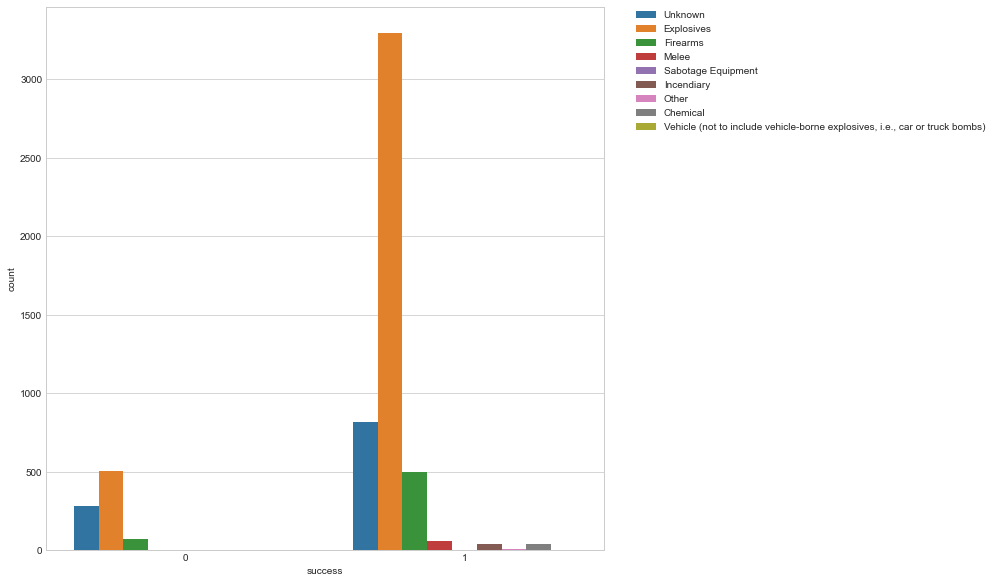

In [634]:
plt.figure(figsize=(10,10))
plt.style.use('seaborn-whitegrid')
sns.countplot(x='success',hue='weaptype1_txt',data=a)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [637]:
data.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,city,...,natlty1_txt,gname,motive,nperps,weaptype1,weaptype1_txt,nkill,propextent,country_acronym,month
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,...,Dominican Republic,MANO-D,Unknown,NaN,13,Unknown,1.0,NaN,DOM,Jul
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Mexico city,...,Belgium,23rd of September Communist League,Unknown,7.0,13,Unknown,0.0,NaN,MEX,Unknown
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Unknown,...,United States,Unknown,Unknown,NaN,13,Unknown,1.0,NaN,PHL,Jan
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Athens,...,United States,Unknown,Unknown,NaN,6,Explosives,NaN,NaN,GRC,Jan
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,United States,Unknown,Unknown,NaN,8,Incendiary,NaN,NaN,JPN,Jan


In [636]:
data['propextent'].value_counts()

3.0    43304
4.0    19846
2.0      909
1.0        6
Name: propextent, dtype: int64

In [638]:
data['nkill'].value_counts()

0.0      88149
1.0      36576
2.0      14147
3.0       7738
4.0       4961
         ...  
184.0        1
163.0        1
135.0        1
128.0        1
280.0        1
Name: nkill, Length: 205, dtype: int64

In [640]:
data['weaptype1_txt']

0            Unknown
1            Unknown
2            Unknown
3         Explosives
4         Incendiary
             ...    
181686      Firearms
181687    Explosives
181688    Incendiary
181689    Explosives
181690    Explosives
Name: weaptype1_txt, Length: 181691, dtype: object

In [642]:
data['attacktype1_txt'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

In [639]:
data['natlty1_txt'].value_counts()

Iraq                           24113
Pakistan                       13900
India                          12098
Afghanistan                    10931
Colombia                        7922
                               ...  
Man, Isle of                       1
Saba (Netherlands Antilles)        1
Greenland                          1
Tuvalu                             1
Western Sahara                     1
Name: natlty1_txt, Length: 216, dtype: int64

In [ ]:
data.groupby(['iyear','month'])[['success']].sum().iplot(kind=plot_type,color='crimson',legend=True,title=title)

In [645]:
for gname in top20_gname:
    data[data['gname']==gname].groupby(['iyear','month'])[['success']].sum().iplot(color='crimson',legend=True,title=gname)